Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
like = Rosenbrock(10)
transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run13
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=5, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=115, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=5, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_f

In [7]:
sampler.run(strategy=['rejection_prior', 'mcmc'])

[nnest.sampler] [INFO] MCMC steps [50]
[nnest.sampler] [INFO] Initial scale [0.6325]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-3.2034e+05] max logl [-9.3220e+03] logz [-3.2034e+05] vol [1.00000e+00] ncalls [1001] mean calls [0.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-1.7022e+05] max logl [-9.3220e+03] logz [-1.7023e+05] vol [8.18731e-01] ncalls [1222] mean calls [1.2000]
[nnest.sampler] [INFO] Step [400] loglstar [-1.4046e+05] max logl [-4.6305e+03] logz [-1.4047e+05] vol [6.70320e-01] ncalls [1485] mean calls [1.5000]
[nnest.sampler] [INFO] Step [600] loglstar [-1.2237e+05] max logl [-4.4251e+03] logz [-1.2238e+05] vol [5.48812e-01] ncalls [1806] mean calls [2.0000]
[nnest.sampler] [INFO] Step [800] loglstar [-1.0683e+05] max logl [-4.4251e+03] logz [-1.0683e+05] vol [4.49329e-01] ncalls [2229] mean calls [2.0000]
[nnest.sampler] [INFO] Step [1000] loglstar [-9.5507e+04] max logl [-4.4251e+03] logz [-9.5515e+04] vol [3.67879e-0

[nnest.sampler] [INFO] Acceptance [0.5680] min ESS [2.8199] max ESS [12.4224] average jump [0.1611]
[nnest.sampler] [INFO] Step [6400] loglstar [-9.3634e+03] maxlogl [-4.4131e+02] logz [-9.3765e+03] vol [1.66156e-03] ncalls [140383] scale [0.4598]
[nnest.sampler] [INFO] Acceptance [0.5520] min ESS [1.4025] max ESS [16.8428] average jump [0.1325]
[nnest.sampler] [INFO] Step [6600] loglstar [-8.6685e+03] maxlogl [-4.4131e+02] logz [-8.6819e+03] vol [1.36037e-03] ncalls [147570] scale [0.5467]
[nnest.sampler] [INFO] Acceptance [0.5100] min ESS [3.3629] max ESS [13.8769] average jump [0.1467]
[nnest.sampler] [INFO] Step [6800] loglstar [-8.0318e+03] maxlogl [-4.4131e+02] logz [-8.0455e+03] vol [1.11378e-03] ncalls [154943] scale [0.2024]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0484]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0122] validation loss [0.0116]
[nnest.trainer] [INFO] Epoch [63] ran out of patience
[nnest.trainer] [IN

[nnest.sampler] [INFO] Acceptance [0.5500] min ESS [7.0939] max ESS [15.4506] average jump [0.0932]
[nnest.sampler] [INFO] Step [11600] loglstar [-1.3544e+03] maxlogl [-1.6741e+02] logz [-1.3716e+03] vol [9.16609e-06] ncalls [334377] scale [0.1573]
[nnest.sampler] [INFO] Acceptance [0.5480] min ESS [4.2850] max ESS [15.0177] average jump [0.0948]
[nnest.sampler] [INFO] Step [11800] loglstar [-1.2808e+03] maxlogl [-1.6741e+02] logz [-1.2982e+03] vol [7.50456e-06] ncalls [341908] scale [0.4153]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0298]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0369] validation loss [-0.0383]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0417] validation loss [-0.0428]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.0430] validation loss [-0.0433]
[nnest.trainer] [INFO] Epoch [221] ran out of patience
[nnest.trainer] [INFO] Best epoch [171] validation loss [-0.0436]
[nnest.sampler] [INFO] Acceptanc

[nnest.sampler] [INFO] Acceptance [0.5660] min ESS [4.0549] max ESS [15.7116] average jump [0.0464]
[nnest.sampler] [INFO] Step [16600] loglstar [-3.0292e+02] maxlogl [-3.8621e+01] logz [-3.2360e+02] vol [6.17606e-08] ncalls [521451] scale [0.1278]
[nnest.sampler] [INFO] Acceptance [0.5740] min ESS [3.5389] max ESS [14.8529] average jump [0.0392]
[nnest.sampler] [INFO] Step [16800] loglstar [-2.8862e+02] maxlogl [-3.8621e+01] logz [-3.0963e+02] vol [5.05653e-08] ncalls [529246] scale [0.1687]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0181]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0862] validation loss [-0.0885]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0914] validation loss [-0.0897]
[nnest.trainer] [INFO] Epoch [127] ran out of patience
[nnest.trainer] [INFO] Best epoch [77] validation loss [-0.0900]
[nnest.sampler] [INFO] Acceptance [0.6240] min ESS [5.5840] max ESS [24.5112] average jump [0.0424]
[nnest.sampler]

[nnest.sampler] [INFO] Acceptance [0.5300] min ESS [7.1913] max ESS [36.2266] average jump [0.0322]
[nnest.sampler] [INFO] Step [21800] loglstar [-9.2372e+01] maxlogl [-2.1070e+01] logz [-1.1716e+02] vol [3.40706e-10] ncalls [721175] scale [0.2356]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0109]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.1368] validation loss [-0.1413]
[nnest.trainer] [INFO] Epoch [57] ran out of patience
[nnest.trainer] [INFO] Best epoch [7] validation loss [-0.1427]
[nnest.sampler] [INFO] Acceptance [0.5620] min ESS [7.5976] max ESS [31.8045] average jump [0.0346]
[nnest.sampler] [INFO] Step [22000] loglstar [-8.8299e+01] maxlogl [-2.1070e+01] logz [-1.1330e+02] vol [2.78947e-10] ncalls [728863] scale [0.1865]
[nnest.sampler] [INFO] Acceptance [0.5940] min ESS [9.6304] max ESS [51.0000] average jump [0.0304]
[nnest.sampler] [INFO] Step [22200] loglstar [-8.4671e+01] maxlogl [-2.1070e+01] logz [-1.0970e+02]

[nnest.sampler] [INFO] Acceptance [0.4440] min ESS [7.6171] max ESS [51.0000] average jump [0.0231]
[nnest.sampler] [INFO] Step [26800] loglstar [-3.5197e+01] maxlogl [-1.4105e+01] logz [-6.3576e+01] vol [2.29566e-12] ncalls [914791] scale [0.1654]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0065]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.1887] validation loss [-0.1909]
[nnest.trainer] [INFO] Epoch [55] ran out of patience
[nnest.trainer] [INFO] Best epoch [5] validation loss [-0.1925]
[nnest.sampler] [INFO] Acceptance [0.6160] min ESS [5.6352] max ESS [51.0000] average jump [0.0213]
[nnest.sampler] [INFO] Step [27000] loglstar [-3.3923e+01] maxlogl [-1.4105e+01] logz [-6.2552e+01] vol [1.87953e-12] ncalls [922471] scale [0.2966]
[nnest.sampler] [INFO] Acceptance [0.5440] min ESS [8.0297] max ESS [51.0000] average jump [0.0230]
[nnest.sampler] [INFO] Step [27200] loglstar [-3.2856e+01] maxlogl [-1.1811e+01] logz [-6.1593e+01]

[nnest.sampler] [INFO] Step [31600] loglstar [-1.6996e+01] maxlogl [-7.1136e+00] logz [-4.9011e+01] vol [1.88927e-14] ncalls [1104167] scale [0.3886]
[nnest.sampler] [INFO] Acceptance [0.5340] min ESS [6.4335] max ESS [22.5334] average jump [0.0232]
[nnest.sampler] [INFO] Step [31800] loglstar [-1.6578e+01] maxlogl [-7.1136e+00] logz [-4.8721e+01] vol [1.54680e-14] ncalls [1112065] scale [0.2118]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0040]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.2362] validation loss [-0.2414]
[nnest.trainer] [INFO] Epoch [72] ran out of patience
[nnest.trainer] [INFO] Best epoch [22] validation loss [-0.2431]
[nnest.sampler] [INFO] Acceptance [0.5180] min ESS [9.6600] max ESS [51.0000] average jump [0.0193]
[nnest.sampler] [INFO] Step [32000] loglstar [-1.6100e+01] maxlogl [-7.1136e+00] logz [-4.8440e+01] vol [1.26642e-14] ncalls [1120007] scale [0.3785]
[nnest.sampler] [INFO] Acceptance [0.5320] min

[nnest.sampler] [INFO] Step [36600] loglstar [-8.7632e+00] maxlogl [-1.7647e+00] logz [-4.4602e+01] vol [1.27298e-16] ncalls [1307228] scale [0.1719]
[nnest.sampler] [INFO] Acceptance [0.4880] min ESS [19.7092] max ESS [51.0000] average jump [0.0180]
[nnest.sampler] [INFO] Step [36800] loglstar [-8.5291e+00] maxlogl [-1.7647e+00] logz [-4.4511e+01] vol [1.04223e-16] ncalls [1315282] scale [0.2139]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0024]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.2886] validation loss [-0.2929]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.2921] validation loss [-0.2952]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.2922] validation loss [-0.2956]
[nnest.trainer] [INFO] Epoch [300] train loss [-0.2929] validation loss [-0.2952]
[nnest.trainer] [INFO] Epoch [305] ran out of patience
[nnest.trainer] [INFO] Best epoch [255] validation loss [-0.2959]
[nnest.sampler] [INFO] Acceptance [0.5740] min 

[nnest.sampler] [INFO] Acceptance [0.4440] min ESS [8.8535] max ESS [51.0000] average jump [0.0151]
[nnest.sampler] [INFO] Step [41600] loglstar [-3.7446e+00] maxlogl [-6.5617e-01] logz [-4.3210e+01] vol [8.57728e-19] ncalls [1515867] scale [0.2089]
[nnest.sampler] [INFO] Acceptance [0.4860] min ESS [18.2839] max ESS [51.0000] average jump [0.0157]
[nnest.sampler] [INFO] Step [41800] loglstar [-3.5961e+00] maxlogl [-6.5617e-01] logz [-4.3188e+01] vol [7.02248e-19] ncalls [1524112] scale [0.1860]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0015]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.3385] validation loss [-0.3407]
[nnest.trainer] [INFO] Epoch [79] ran out of patience
[nnest.trainer] [INFO] Best epoch [29] validation loss [-0.3427]
[nnest.sampler] [INFO] Acceptance [0.6220] min ESS [26.8847] max ESS [51.0000] average jump [0.0148]
[nnest.sampler] [INFO] Step [42000] loglstar [-3.4630e+00] maxlogl [-6.5617e-01] logz [-4.3167

In [8]:
print(sampler.logz)

-42.9802149805778


In [ ]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [ ]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

18086.393863121666
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      9.2516586E-01  2.6981868E-01  9.3341772E-01  1.0365930E+00  two    7.1703833E-01  1.1047826E+00  two   -9.7542077E-01  1.0866547E+00  two     p_{1}
param2      9.3182846E-01  1.5269376E-01  9.2015800E-01  1.0368733E+00  two    6.2411091E-01  1.0954800E+00  two    6.0727149E-02  1.0845903E+00  two     p_{2}
param3      8.9721629E-01  1.9484858E-01  8.9964188E-01  1.0394360E+00  two    4.3442300E-01  1.0977941E+00  two   -9.9582493E-03  1.0830653E+00  two     p_{3}
param4      8.4792135E-01  2.4044822E-01  8.5833712E-01  1.0455209E+00  two   -6.8972712E-03  1.0897274E+00  two   -5.4605156E-02  1.0765548E+00  two     p_{4}
param5      7.8073463E-01  2.8507104E-01  7.7193835E-01  1.0523843E+00  two   -3.3312231E-02  1.0817633E+00  two   -5.7206296E-02  1.0878722E+00  tw

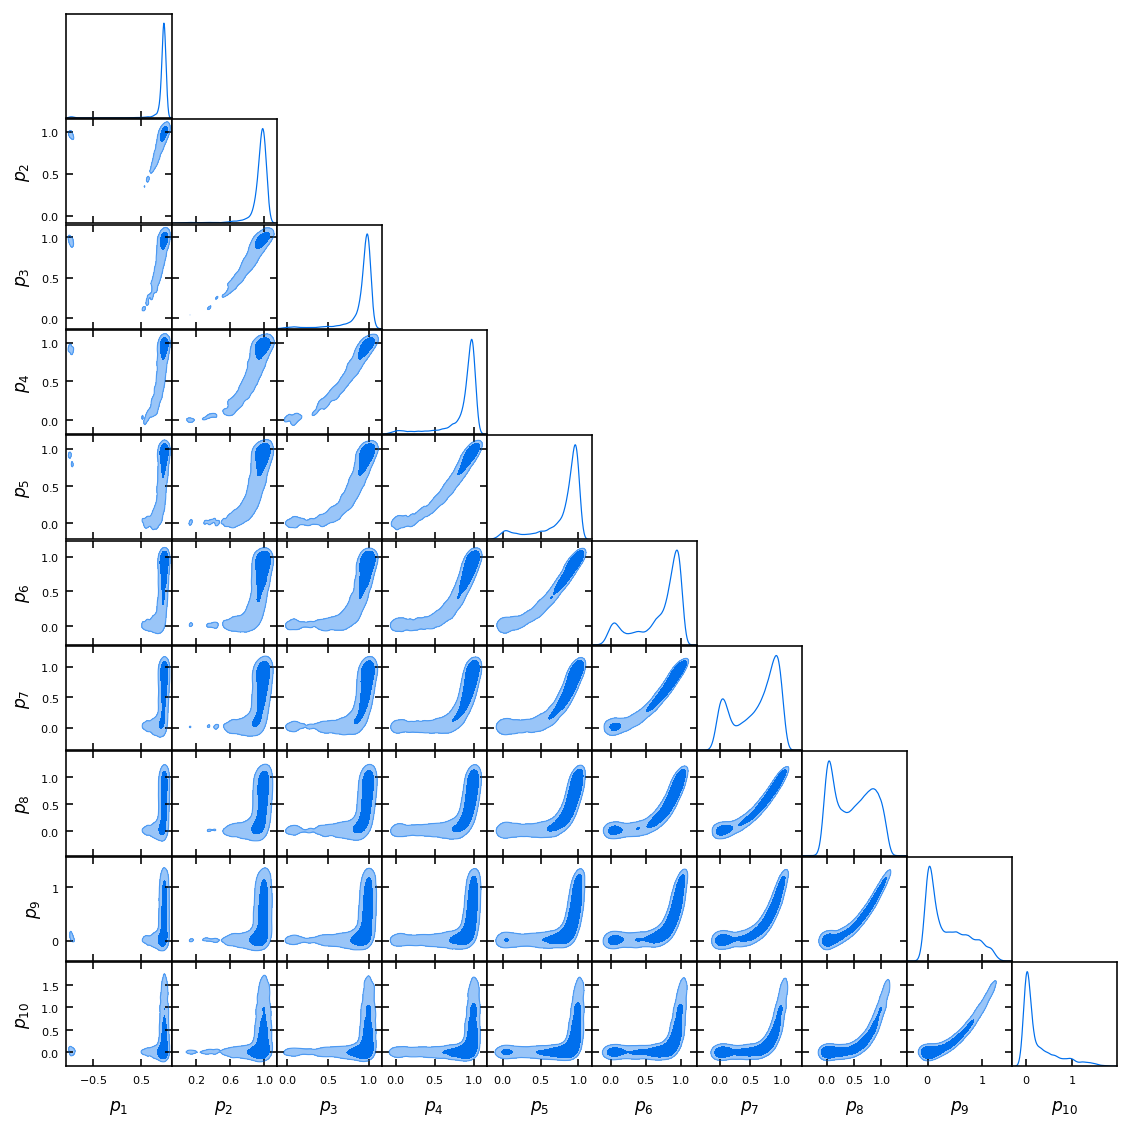

In [ ]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)